## Importing required packages

In [1]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
import statsmodels.api as sm

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
sns.set_style('whitegrid')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv('/kaggle/input/factors-affecting-campus-placement/Placement_Data_Full_Class.csv')
df.head(10)

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.00,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.50,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.00,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.00,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.80,Mkt&Fin,55.50,Placed,425000.0
5,6,M,55.00,Others,49.80,Others,Science,67.25,Sci&Tech,Yes,55.00,Mkt&Fin,51.58,Not Placed,NaN
6,7,F,46.00,Others,49.20,Others,Commerce,79.00,Comm&Mgmt,No,74.28,Mkt&Fin,53.29,Not Placed,NaN
7,8,M,82.00,Central,64.00,Central,Science,66.00,Sci&Tech,Yes,67.00,Mkt&Fin,62.14,Placed,252000.0
8,9,M,73.00,Central,79.00,Central,Commerce,72.00,Comm&Mgmt,No,91.34,Mkt&Fin,61.29,Placed,231000.0
9,10,M,58.00,Central,70.00,Central,Commerce,61.00,Comm&Mgmt,No,54.00,Mkt&Fin,52.21,Not Placed,NaN


In [3]:
df.drop('sl_no', inplace = True, axis = 1)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          215 non-null    object 
 1   ssc_p           215 non-null    float64
 2   ssc_b           215 non-null    object 
 3   hsc_p           215 non-null    float64
 4   hsc_b           215 non-null    object 
 5   hsc_s           215 non-null    object 
 6   degree_p        215 non-null    float64
 7   degree_t        215 non-null    object 
 8   workex          215 non-null    object 
 9   etest_p         215 non-null    float64
 10  specialisation  215 non-null    object 
 11  mba_p           215 non-null    float64
 12  status          215 non-null    object 
 13  salary          148 non-null    float64
dtypes: float64(6), object(8)
memory usage: 23.6+ KB


In [5]:
df.isnull().sum()

gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [6]:
df.describe()

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


# Exploratory Data Analysis

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


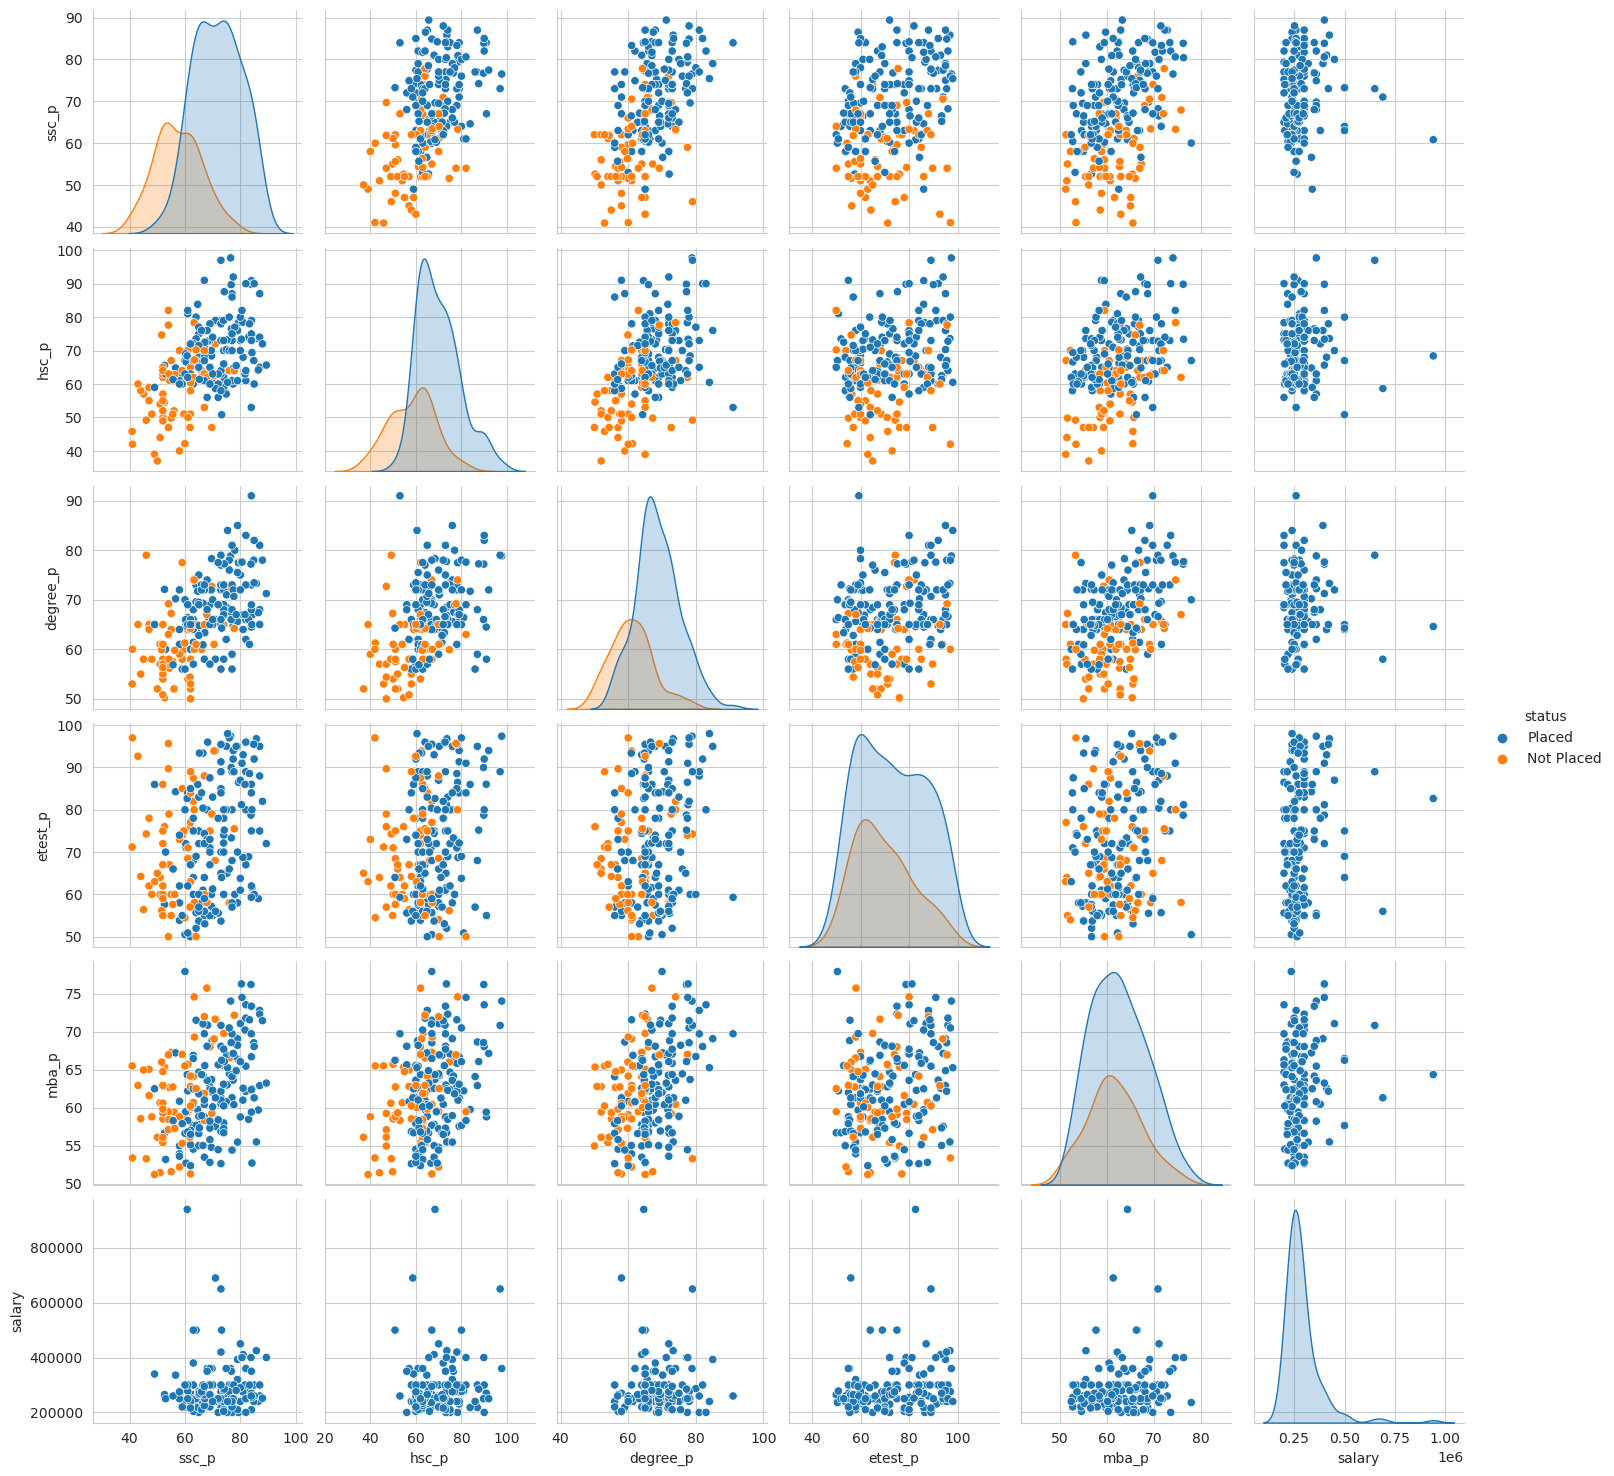

In [7]:
sns.pairplot(data = df, hue = 'status')

## Placement Demographics

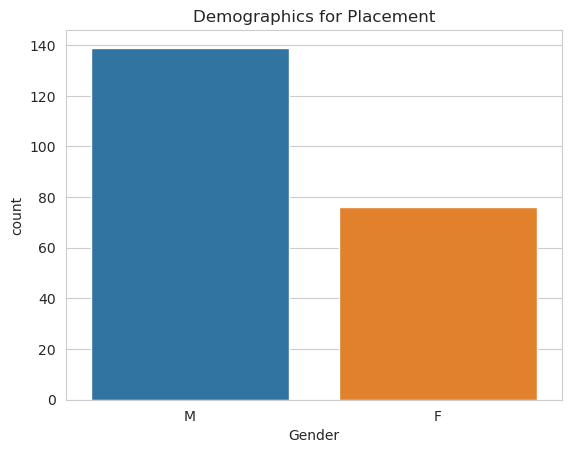

In [8]:
sns.countplot(x = df['gender'])
plt.title('Demographics for Placement')
plt.xlabel('Gender')
plt.show()

## Placement Status count

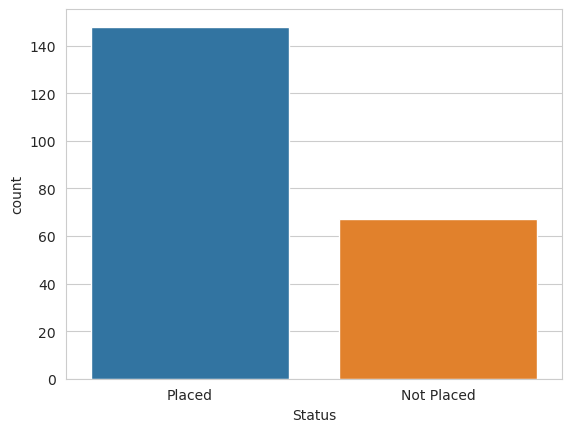

In [9]:
sns.countplot(x = df['status'])
plt.xlabel('Status')
plt.show()

## Placement distribution based on Secondary Education percentage distinguished by Gender

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


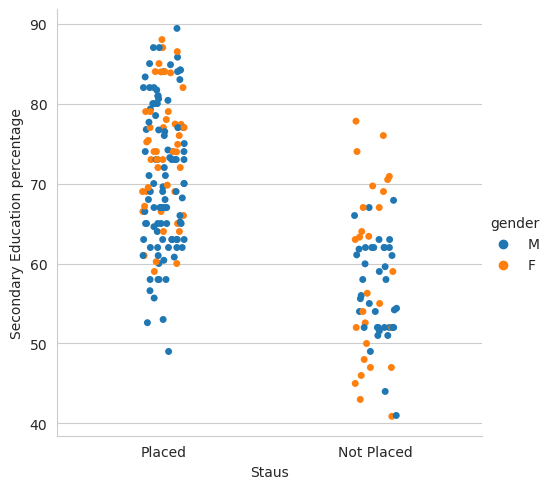

In [10]:
sns.catplot(x = 'status', y = 'ssc_p', hue = 'gender', data = df)
plt.xlabel('Staus')
plt.ylabel('Secondary Education percentage')
plt.show()

## Salary offered compared with Secondary Education Boards

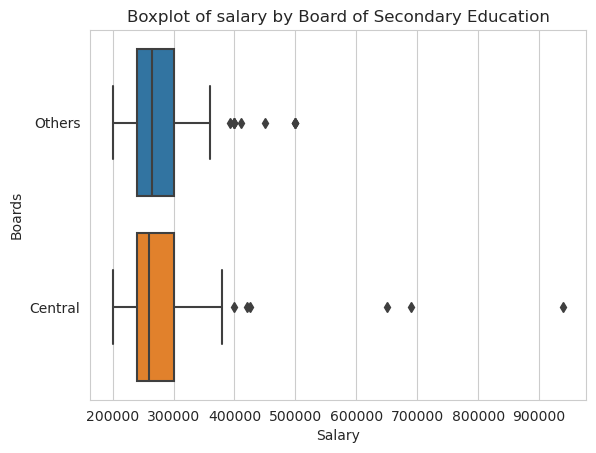

In [11]:
sns.boxplot(x = 'salary', y = 'ssc_b', data = df)
plt.title('Boxplot of salary by Board of Secondary Education')
plt.ylabel('Boards')
plt.xlabel('Salary')
plt.show()

The median of the salary is almost the same for any Secondary Education Board

## Placement by Secondary Education Boards

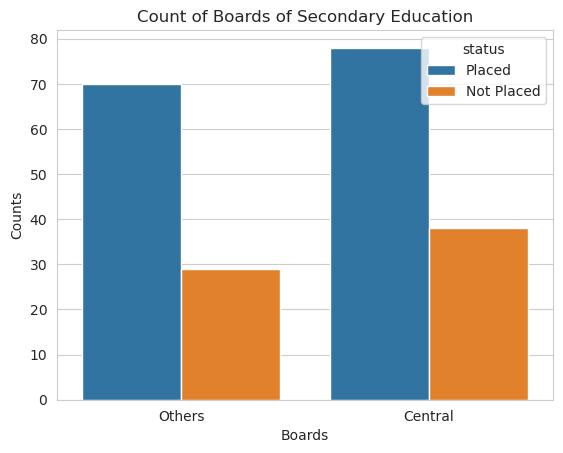

In [12]:
sns.countplot(x = 'ssc_b', hue='status', data = df)
plt.title('Count of Boards of Secondary Education')
plt.xlabel('Boards')
plt.ylabel('Counts')
plt.show()

Students from 'Central' board for Secondary Education appears to be mostly compared to other boards.

In [13]:
df.groupby('ssc_b')['status'].value_counts(normalize=False)

ssc_b    status    
Central  Placed        78
         Not Placed    38
Others   Placed        70
         Not Placed    29
Name: status, dtype: int64

## Placement distribution based on Higher Secondary Education percentage distinguished by Gender

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


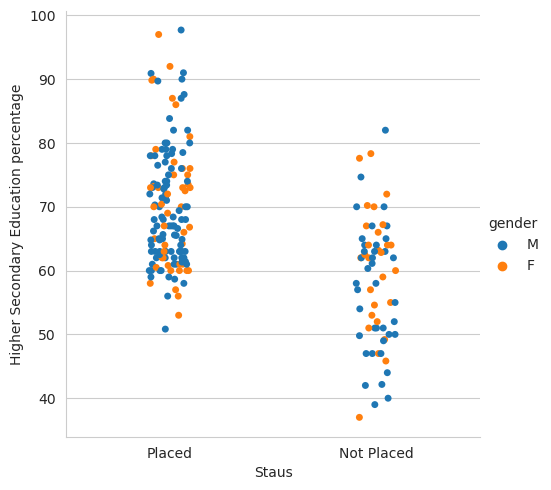

In [14]:
sns.catplot(x = 'status', y = 'hsc_p', hue = 'gender', data = df)
plt.xlabel('Staus')
plt.ylabel('Higher Secondary Education percentage')
plt.show()

## Salary offered comapared with Higher Secondary Education Boards

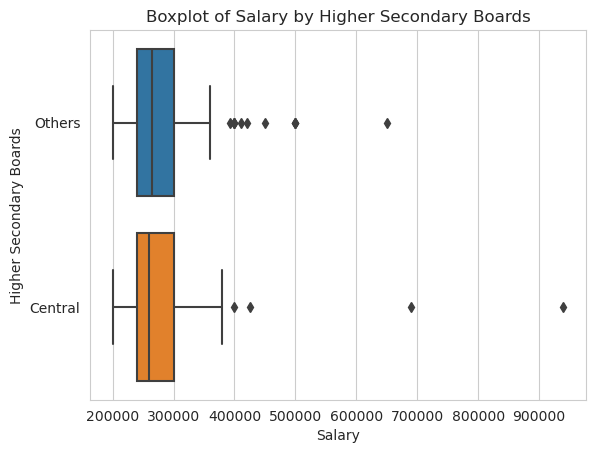

In [15]:
sns.boxplot(x = 'salary', y = 'hsc_b', data = df)
plt.title('Boxplot of Salary by Higher Secondary Boards')
plt.xlabel('Salary')
plt.ylabel('Higher Secondary Boards')
plt.show()

The median of salary is almost the same for any Higher Secondary Education Boards.

## Placement by Higher Education Boards

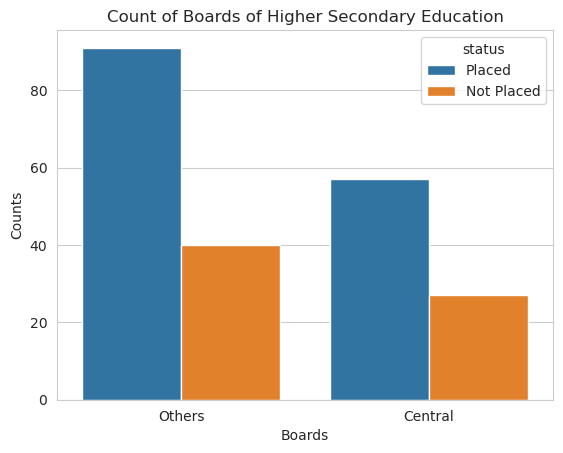

In [16]:
sns.countplot(x = 'hsc_b', hue='status', data = df)
plt.title('Count of Boards of Higher Secondary Education')
plt.xlabel('Boards')
plt.ylabel('Counts')
plt.show()

Students from other Higher Education Boards appears to be placed more than the Central board.

In [17]:
df.groupby('hsc_b')['status'].value_counts(normalize=False)

hsc_b    status    
Central  Placed        57
         Not Placed    27
Others   Placed        91
         Not Placed    40
Name: status, dtype: int64

## Salary by Gender

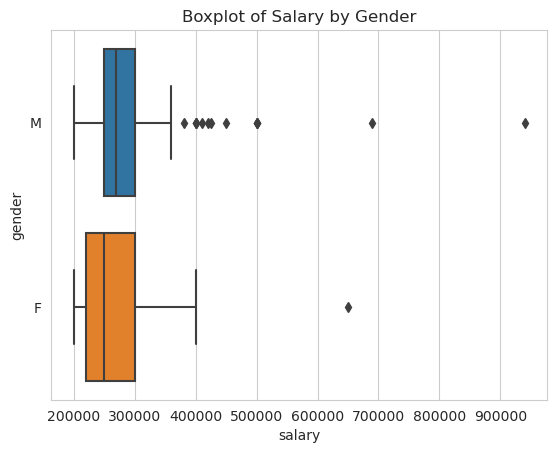

In [18]:
sns.boxplot(x = 'salary', y = 'gender', data = df)
plt.title('Boxplot of Salary by Gender')
plt.show()

The median Salary of Male Applicants is higher than the Female Applicants.

## Placement by Gender

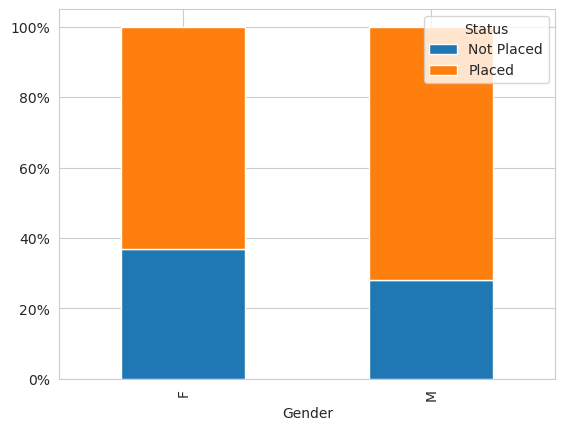

In [19]:
df.groupby(["gender","status"]).size().groupby(level=0, group_keys = False).apply( lambda x: 100 * x / x.sum()).unstack().plot(kind='bar',stacked=True)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.legend(loc = 'upper right',title = 'Status')
plt.xlabel('Gender')
plt.show()

Male Applicants appears to be placed more than the female applicants.

## Placement by Work Experience

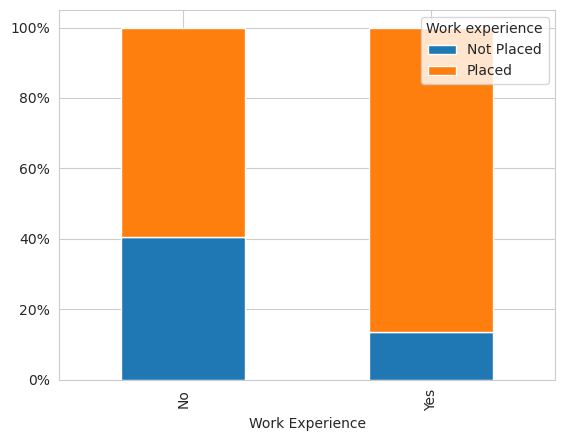

In [20]:
df.groupby(["workex","status"]).size().groupby(level=0, group_keys=False).apply( lambda x: 100 * x / x.sum()).unstack().plot(kind='bar',stacked=True)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.legend(loc = 'upper right',title = 'Work experience')
plt.xlabel('Work Experience')
plt.show()

Having working experience is more likely to get placed and it has the most influence by comparing the graphs

## Work Experience Trend

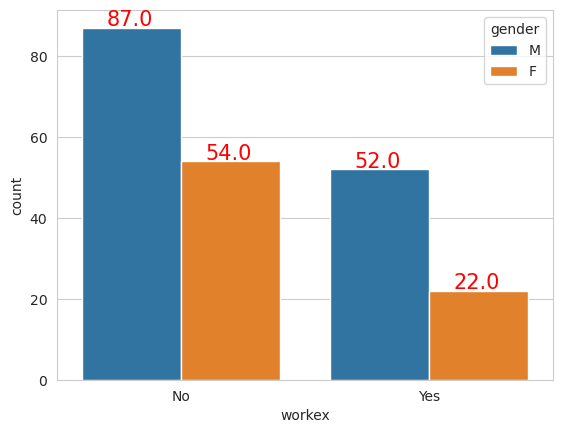

In [21]:
ax = sns.countplot(x = 'workex', hue = df.gender, data = df)
totals = []
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_x()--.1, i.get_height()+.5, \
            str(round(i.get_height(), 2)), fontsize=15,
                color='red')
plt.show()

## Placement by Specialisation

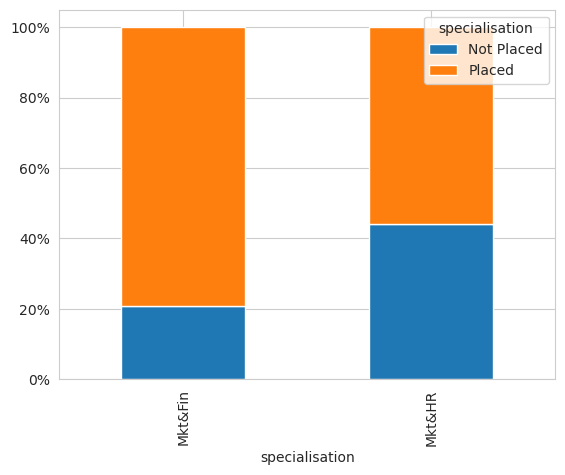

In [22]:
df.groupby(["specialisation","status"]).size().groupby(level=0, group_keys = False).apply( lambda x: 100 * x / x.sum()).unstack().plot(kind='bar',stacked=True)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.legend(loc = 'upper right',title = 'specialisation')
plt.show()

For Post Graduation(MBA), mrkt/finance are more likely to get placed than mrkt/hr

## Plots of Salary with Percentages of Degree, MBA and Education Boards

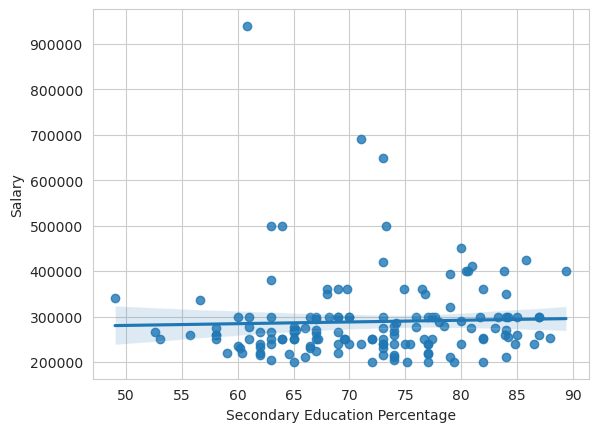

In [23]:
sns.regplot(x = 'ssc_p', y = 'salary', data = df)
plt.xlabel('Secondary Education Percentage')
plt.ylabel('Salary')
plt.show()

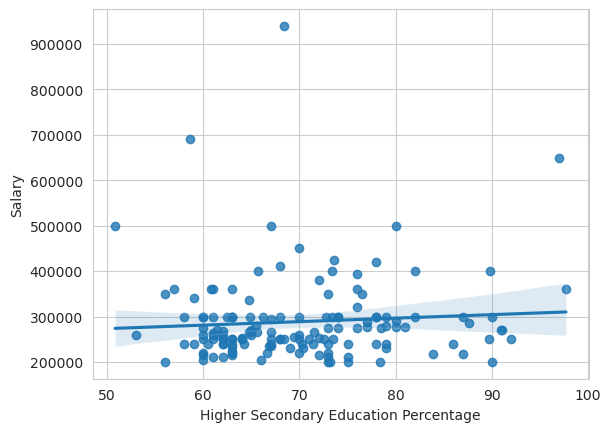

In [24]:
sns.regplot(x = 'hsc_p', y = 'salary', data = df)
plt.xlabel('Higher Secondary Education Percentage')
plt.ylabel('Salary')
plt.show()

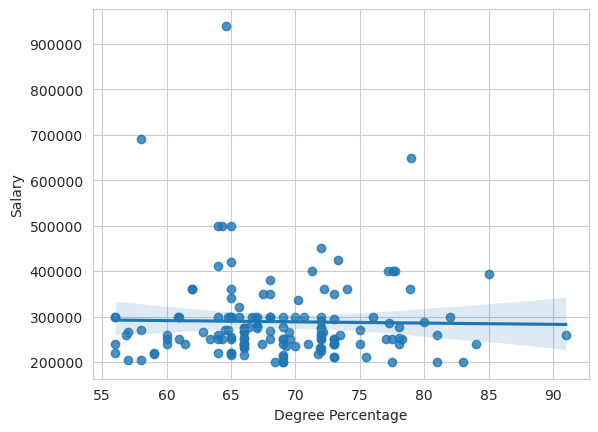

In [25]:
sns.regplot(x = 'degree_p', y = 'salary', data = df)
plt.xlabel('Degree Percentage')
plt.ylabel('Salary')
plt.show()

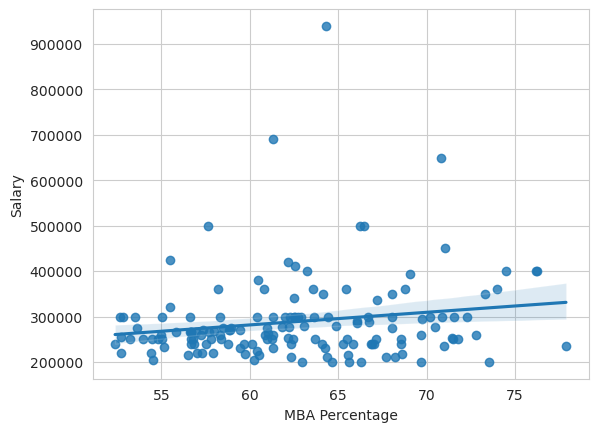

In [26]:
sns.regplot(x = 'mba_p', y = 'salary', data = df)
plt.xlabel('MBA Percentage')
plt.ylabel('Salary')
plt.show()

# Classification

## Random Forest Regressor and Classifier

Applying One-hot encoding to categorical variables

In [27]:
df.loc[df['gender'] == 'M', 'gender'] = 1.0
df.loc[df['gender'] == 'F', 'gender'] = 0.0

df.loc[df['status'] == 'Placed', 'status'] = 1
df.loc[df['status'] == 'Not Placed', 'status'] = 0

df.loc[df['workex'] == 'Yes', 'workex'] = 1.0
df.loc[df['workex'] == 'No', 'workex'] = 0.0

categorical_var = ['ssc_b','hsc_b','hsc_s','degree_t','specialisation']
for variable in categorical_var:
    df[variable].fillna('Missing', inplace = True)
    dummies = pd.get_dummies(df[variable], prefix=variable)
    df = pd.concat([df,dummies],axis=1)
    df.drop([variable],axis=1,inplace=True)
df.head()

,gender,ssc_p,hsc_p,degree_p,workex,etest_p,mba_p,status,salary,ssc_b_Central,...,hsc_b_Central,hsc_b_Others,hsc_s_Arts,hsc_s_Commerce,hsc_s_Science,degree_t_Comm&Mgmt,degree_t_Others,degree_t_Sci&Tech,specialisation_Mkt&Fin,specialisation_Mkt&HR
0,1.0,67.00,91.00,58.00,0.0,55.0,58.80,1,270000.0,0,...,0,1,0,1,0,0,0,1,0,1
1,1.0,79.33,78.33,77.48,1.0,86.5,66.28,1,200000.0,1,...,0,1,0,0,1,0,0,1,1,0
2,1.0,65.00,68.00,64.00,0.0,75.0,57.80,1,250000.0,1,...,1,0,1,0,0,1,0,0,1,0
3,1.0,56.00,52.00,52.00,0.0,66.0,59.43,0,NaN,1,...,1,0,0,0,1,0,0,1,0,1
4,1.0,85.80,73.60,73.30,0.0,96.8,55.50,1,425000.0,1,...,1,0,0,1,0,1,0,0,1,0


In [28]:
recruit_placed = df[df['status'] == 1].drop('status',axis = 1)
recruit_placed.head()

,gender,ssc_p,hsc_p,degree_p,workex,etest_p,mba_p,salary,ssc_b_Central,ssc_b_Others,hsc_b_Central,hsc_b_Others,hsc_s_Arts,hsc_s_Commerce,hsc_s_Science,degree_t_Comm&Mgmt,degree_t_Others,degree_t_Sci&Tech,specialisation_Mkt&Fin,specialisation_Mkt&HR
0,1.0,67.00,91.00,58.00,0.0,55.0,58.80,270000.0,0,1,0,1,0,1,0,0,0,1,0,1
1,1.0,79.33,78.33,77.48,1.0,86.5,66.28,200000.0,1,0,0,1,0,0,1,0,0,1,1,0
2,1.0,65.00,68.00,64.00,0.0,75.0,57.80,250000.0,1,0,1,0,1,0,0,1,0,0,1,0
4,1.0,85.80,73.60,73.30,0.0,96.8,55.50,425000.0,1,0,1,0,0,1,0,1,0,0,1,0
7,1.0,82.00,64.00,66.00,1.0,67.0,62.14,252000.0,1,0,1,0,0,0,1,0,0,1,1,0


In [29]:
x = df.drop(['status','salary'], axis=1)
y = df['status'].astype(float)

train_x, test_x, train_y, test_y = train_test_split(x,y , test_size=0.3, random_state=42)

print(train_x.shape)
print(train_y.shape)

(150, 19)
(150,)


In [30]:
rf_regressor = RandomForestRegressor(100, oob_score=True, n_jobs=-1, random_state=42)
rf_regressor.fit(train_x,train_y)
print('Score: ', rf_regressor.score(train_x,train_y))

Score:  0.930809991638796


<Axes: >

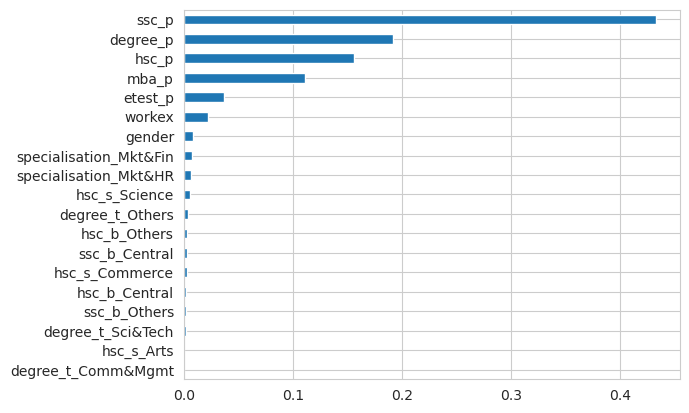

In [31]:
feature_importance = pd.Series(rf_regressor.feature_importances_,index=x.columns)
feature_importance = feature_importance.sort_values()
feature_importance.plot(kind='barh')

#### After training of the initial regressor, we try to find out optimized value by parameter tuning,
* n_estimators: The number of trees in the forest
* max_features: The number of features to consider when looking for the best split
* min_samples_leaf: The minimum number of samples required to be at a leaf node

### n_estimators

30  trees
0.9282329988851727

50  trees
0.934757525083612

100  trees
0.9364538043478261

200  trees
0.9384769544314381

500  trees
0.9381707775919732

1000  trees
0.9368050689799331

2000  trees
0.937170795882107



<Axes: >

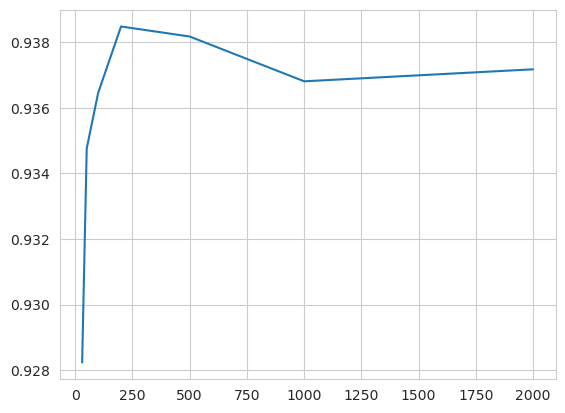

In [32]:
results = []
n_estimator_options = [30,50,100,200,500,1000,2000]

for trees in n_estimator_options:
    model = RandomForestRegressor(trees,oob_score=True,n_jobs=-1,random_state=42)
    model.fit(x,y)
    print(trees," trees")
    score = model.score(train_x,train_y)
    print(score)
    results.append(score)
    print("")
pd.Series(results,n_estimator_options).plot()

### max_features

/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


auto  option
0.9384769544314381

None  option
0.9384769544314381

sqrt  option
0.9390570129598662

log2  option
0.9390570129598662

0.9  option
0.9369554765886288

0.2  option
0.933998745819398



<Axes: >

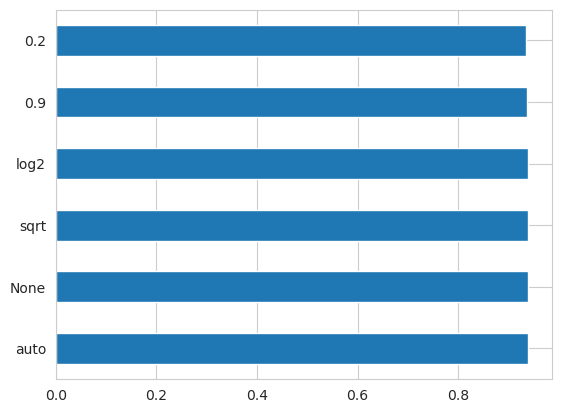

In [33]:
results = []
max_features_options = ['auto',None,'sqrt','log2',0.9,0.2]

for max_features in max_features_options:
    model = RandomForestRegressor(n_estimators=200,oob_score=True,n_jobs=-1, random_state=42,max_features=max_features)
    model.fit(x,y)
    print(max_features," option")
    score = model.score(train_x,train_y)
    print(score)
    results.append(score)
    print("")

pd.Series(results,max_features_options).plot(kind='barh')

### mean_samples_leaf

1  min samples
0.9390570129598662

2  min samples
0.8468437412943985

3  min samples
0.7849329211313523

4  min samples
0.7429301237527113

5  min samples
0.7036783300373053

6  min samples
0.6768184101753146

7  min samples
0.6556513671298128

8  min samples
0.6392326149831353

9  min samples
0.6179466096568267

10  min samples
0.601184726503665



<Axes: >

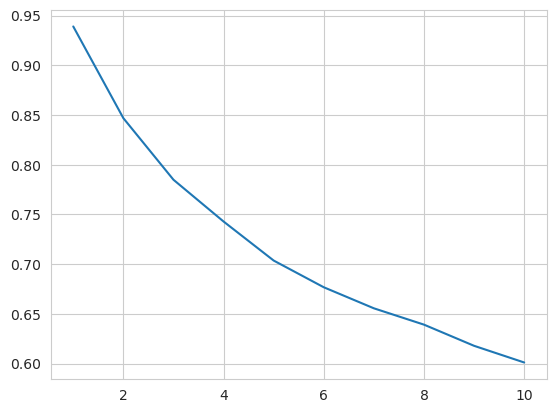

In [34]:
results = []
min_sample_leaf_option = [1,2,3,4,5,6,7,8,9,10]

for min_sample_leaf in min_sample_leaf_option:
    model = RandomForestRegressor(n_estimators=200,oob_score=True,n_jobs=-1,
                                  random_state=42,max_features='sqrt',
                                  min_samples_leaf=min_sample_leaf)
    model.fit(x,y)
    print(min_sample_leaf," min samples")
    score = model.score(train_x,train_y)
    print(score)
    results.append(score)
    print("")

pd.Series(results,min_sample_leaf_option).plot()

#### After the analysis above, the parameter we're choosing for each of the parameter are:

*  n_estimators: 200
*  max_features: sqrt
*  min_samples_leaf: 1


In [35]:
rf_regressor = RandomForestRegressor(200, oob_score=True,max_features='sqrt', n_jobs=-1, random_state=42, min_samples_leaf=1)
rf_regressor.fit(x,y)
print('Score: ', rf_regressor.score(train_x,train_y))

Score:  0.9390570129598662


To check the model performance, the top 10 values from the test dataset and also the predicted probablity from the model are compared. Most of the prediction looks accurate.

In [36]:
pred_y = rf_regressor.predict(test_x)

print(test_y[:10])
print(pred_y[:10])

200    1.0
212    1.0
138    1.0
176    1.0
15     1.0
111    0.0
168    0.0
73     1.0
204    1.0
139    1.0
Name: status, dtype: float64
[0.955 0.955 0.98  0.785 0.995 0.055 0.06  0.95  0.995 0.945]


In [37]:
rf_classifier = RandomForestClassifier(200, oob_score=True,
                                     n_jobs=-1, random_state=42)
rf_classifier.fit(train_x, train_y)

RandomForestClassifier(n_estimators=200, n_jobs=-1, oob_score=True,
                       random_state=42)

In [38]:
pred_y = rf_classifier.predict(test_x)

In [39]:
rf_classifier.score(test_x, test_y)

0.8

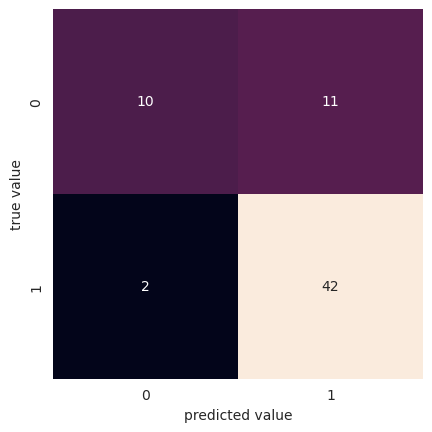

In [40]:
mat = confusion_matrix(test_y,pred_y)
sns.heatmap(mat, square=True, annot=True, cbar=False) 
plt.xlabel('predicted value')
plt.ylabel('true value')
plt.show()

In [41]:
print(classification_report(test_y, pred_y))

              precision    recall  f1-score   support

         0.0       0.83      0.48      0.61        21
         1.0       0.79      0.95      0.87        44

    accuracy                           0.80        65
   macro avg       0.81      0.72      0.74        65
weighted avg       0.81      0.80      0.78        65



### Logistic Regression Classifier

In [42]:
lr_model = LogisticRegression()
lr_model.fit(train_x,train_y)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [43]:
lr_model.score(test_x, test_y)

0.8461538461538461

Text(113.9222222222222, 0.5, 'true value')

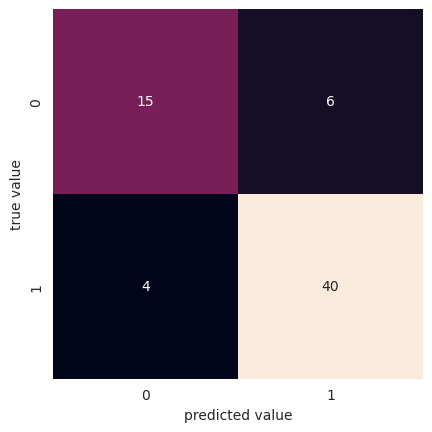

In [44]:
pred_y = lr_model.predict(test_x)
mat = confusion_matrix(test_y,pred_y)
sns.heatmap(mat, square=True, annot=True, cbar=False) 
plt.xlabel('predicted value')
plt.ylabel('true value')

In [45]:
print(classification_report(test_y, pred_y))

              precision    recall  f1-score   support

         0.0       0.79      0.71      0.75        21
         1.0       0.87      0.91      0.89        44

    accuracy                           0.85        65
   macro avg       0.83      0.81      0.82        65
weighted avg       0.84      0.85      0.84        65



In [46]:
lr_coef = pd.DataFrame({"Coefficients":lr_model.coef_[0]},index = x.columns.tolist())
lr_coef = lr_coef.sort_values(by = 'Coefficients')
lr_coef

,Coefficients
specialisation_Mkt&HR,-0.837687
degree_t_Others,-0.800793
hsc_b_Others,-0.541489
hsc_s_Commerce,-0.531373
ssc_b_Central,-0.501750
mba_p,-0.337398
ssc_b_Others,-0.333008
hsc_s_Science,-0.305728
hsc_b_Central,-0.293269
degree_t_Sci&Tech,-0.123712


<Axes: >

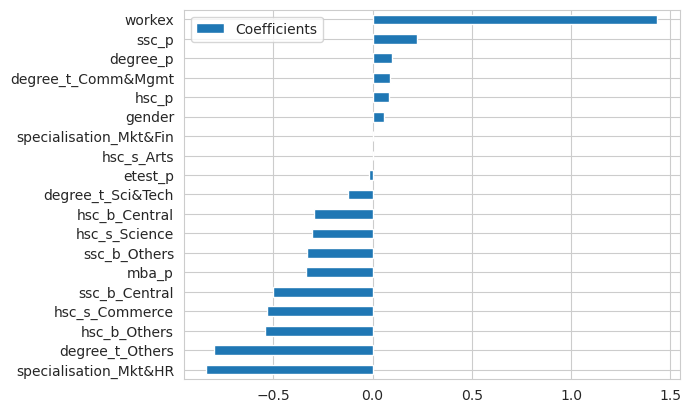

In [47]:
lr_coef.plot(kind='barh')

### Multiple Regression

In [48]:
recruit_placed.head()

,gender,ssc_p,hsc_p,degree_p,workex,etest_p,mba_p,salary,ssc_b_Central,ssc_b_Others,hsc_b_Central,hsc_b_Others,hsc_s_Arts,hsc_s_Commerce,hsc_s_Science,degree_t_Comm&Mgmt,degree_t_Others,degree_t_Sci&Tech,specialisation_Mkt&Fin,specialisation_Mkt&HR
0,1.0,67.00,91.00,58.00,0.0,55.0,58.80,270000.0,0,1,0,1,0,1,0,0,0,1,0,1
1,1.0,79.33,78.33,77.48,1.0,86.5,66.28,200000.0,1,0,0,1,0,0,1,0,0,1,1,0
2,1.0,65.00,68.00,64.00,0.0,75.0,57.80,250000.0,1,0,1,0,1,0,0,1,0,0,1,0
4,1.0,85.80,73.60,73.30,0.0,96.8,55.50,425000.0,1,0,1,0,0,1,0,1,0,0,1,0
7,1.0,82.00,64.00,66.00,1.0,67.0,62.14,252000.0,1,0,1,0,0,0,1,0,0,1,1,0


/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


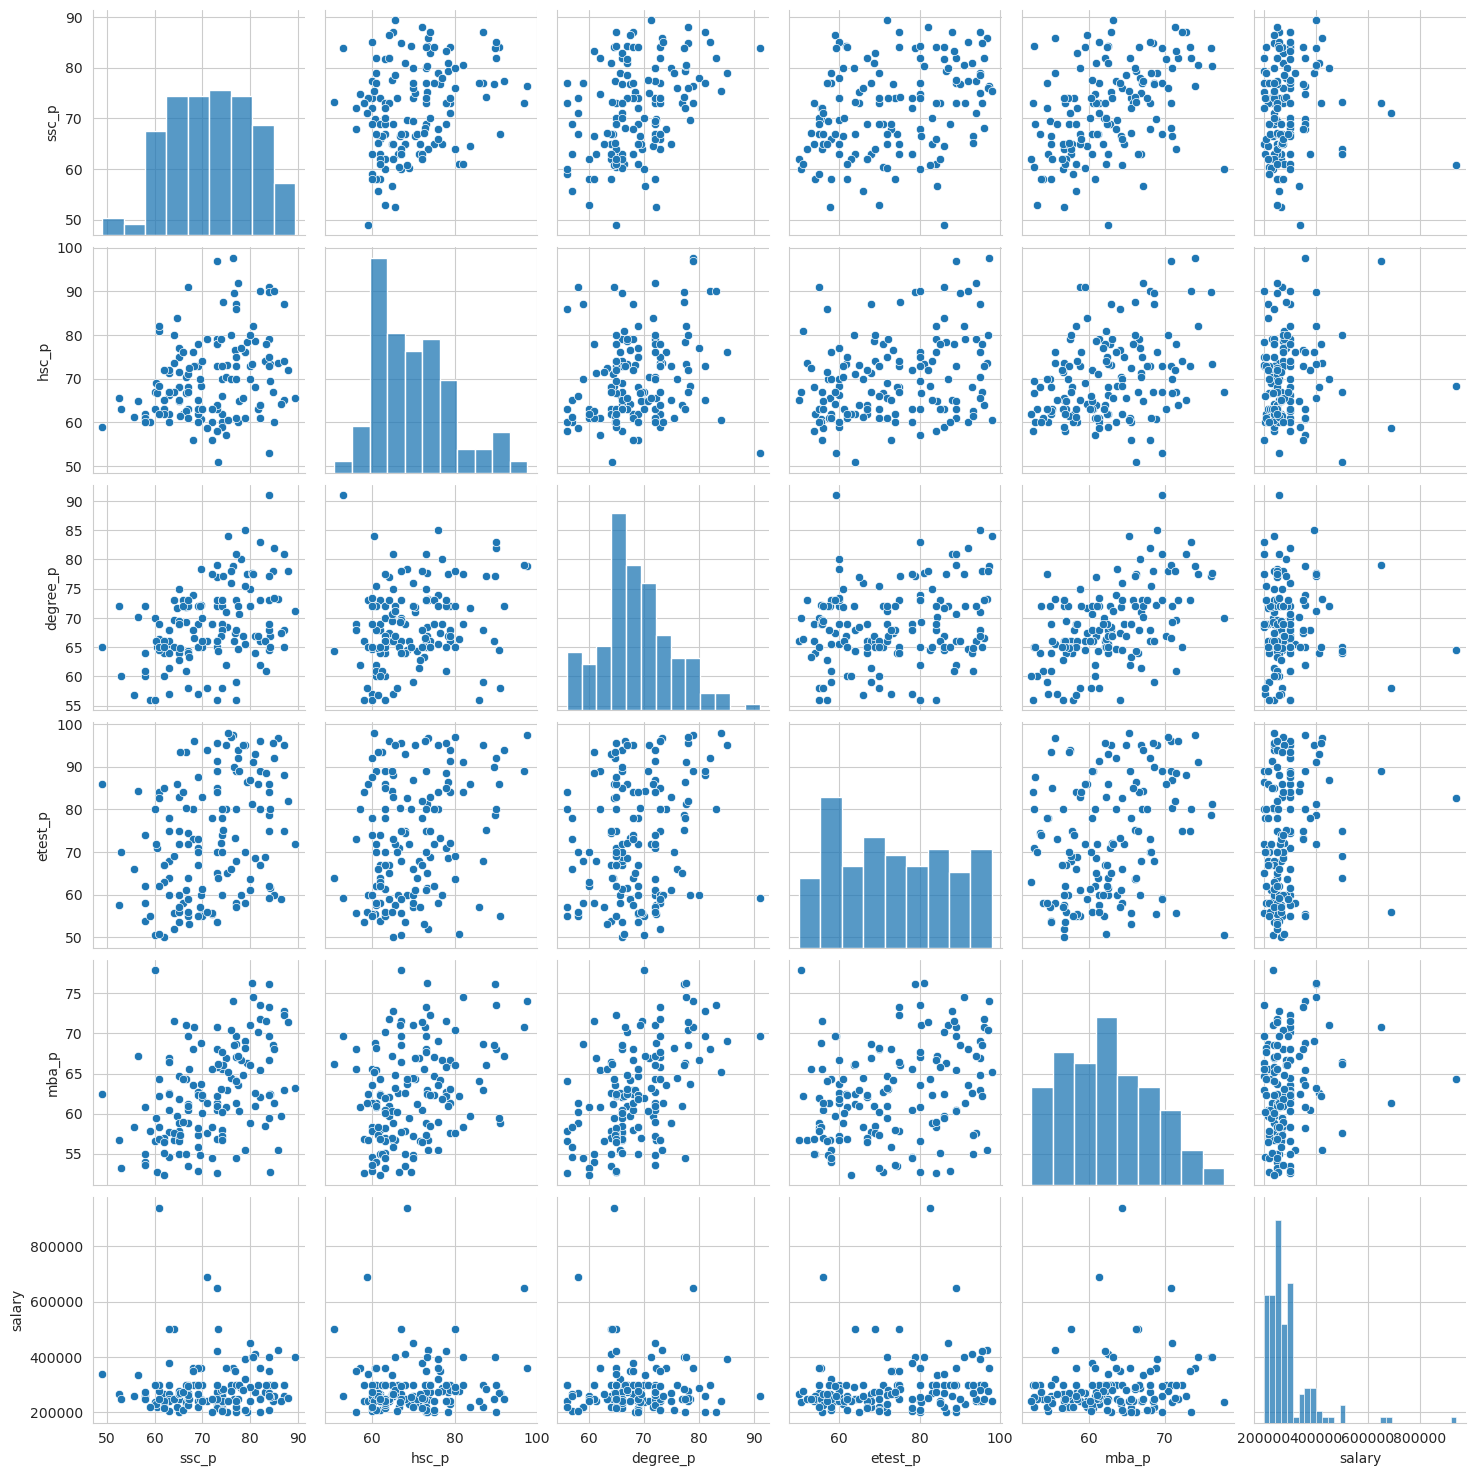

In [49]:
sns.pairplot(recruit_placed[['ssc_p','hsc_p','degree_p','etest_p','mba_p','salary']])

In [50]:
recruit_placed[['ssc_p','hsc_p','degree_p','etest_p','mba_p','salary']].corr()

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
ssc_p,1.000000,0.293416,0.380657,0.317892,0.430560,0.035330
hsc_p,0.293416,1.000000,0.221307,0.284672,0.329983,0.076819
degree_p,0.380657,0.221307,1.000000,0.217683,0.494093,-0.019272
etest_p,0.317892,0.284672,0.217683,1.000000,0.284143,0.178307
mba_p,0.430560,0.329983,0.494093,0.284143,1.000000,0.175013
salary,0.035330,0.076819,-0.019272,0.178307,0.175013,1.000000


In [51]:


var = ['ssc_p','hsc_p','degree_p','etest_p','mba_p','gender','workex']
x = recruit_placed.loc[:,var]
x = recruit_placed.loc[:,recruit_placed.columns != 'salary']
y = recruit_placed.loc[:,recruit_placed.columns == 'salary']
x.head()



,gender,ssc_p,hsc_p,degree_p,workex,etest_p,mba_p,ssc_b_Central,ssc_b_Others,hsc_b_Central,hsc_b_Others,hsc_s_Arts,hsc_s_Commerce,hsc_s_Science,degree_t_Comm&Mgmt,degree_t_Others,degree_t_Sci&Tech,specialisation_Mkt&Fin,specialisation_Mkt&HR
0,1.0,67.00,91.00,58.00,0.0,55.0,58.80,0,1,0,1,0,1,0,0,0,1,0,1
1,1.0,79.33,78.33,77.48,1.0,86.5,66.28,1,0,0,1,0,0,1,0,0,1,1,0
2,1.0,65.00,68.00,64.00,0.0,75.0,57.80,1,0,1,0,1,0,0,1,0,0,1,0
4,1.0,85.80,73.60,73.30,0.0,96.8,55.50,1,0,1,0,0,1,0,1,0,0,1,0
7,1.0,82.00,64.00,66.00,1.0,67.0,62.14,1,0,1,0,0,0,1,0,0,1,1,0


In [52]:
train_x, test_x, train_y, test_y = train_test_split(x,y , test_size=0.2, random_state=42)

print(train_x.shape)
print(test_x.shape)

(118, 19)
(30, 19)


In [53]:
linear_model = sm.OLS(train_y,train_x.astype(float))
results = linear_model.fit()
results.params

gender                    29808.561533
ssc_p                     -1464.697551
hsc_p                      -653.073199
degree_p                  -2739.169894
workex                     9239.498110
etest_p                     334.790203
mba_p                      4649.383292
ssc_b_Central             53779.777395
ssc_b_Others              75409.769494
hsc_b_Central             79410.085598
hsc_b_Others              49779.461291
hsc_s_Arts                 1791.585130
hsc_s_Commerce            69733.875879
hsc_s_Science             57664.085880
degree_t_Comm&Mgmt        22006.485031
degree_t_Others           49731.548384
degree_t_Sci&Tech         57451.513473
specialisation_Mkt&Fin    76747.945205
specialisation_Mkt&HR     52441.601684
dtype: float64

In [54]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.179
Model:                            OLS   Adj. R-squared:                  0.068
Method:                 Least Squares   F-statistic:                     1.609
Date:                Sat, 22 Jul 2023   Prob (F-statistic):             0.0889
Time:                        09:03:59   Log-Likelihood:                -1506.2
No. Observations:                 118   AIC:                             3042.
Df Residuals:                     103   BIC:                             3084.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
gender                  2.98

In [55]:
pred_y = results.predict(test_x)
print(pred_y[:10])
print(test_y[:10])
col = ['actual','prediction']
prediction = pd.concat([test_y,pred_y],axis=1)
prediction.columns = col
prediction

178    341043.113506
74     354627.307077
203    314951.023467
28     308256.144577
145     271649.79132
20     265493.078661
112    277506.034866
48     316283.115047
117    323664.099279
15     302463.132113
dtype: object
       salary
178  350000.0
74   336000.0
203  260000.0
28   350000.0
145  400000.0
20   265000.0
112  250000.0
48   250000.0
117  240000.0
15   200000.0


,actual,prediction
178,350000.0,341043.113506
74,336000.0,354627.307077
203,260000.0,314951.023467
28,350000.0,308256.144577
145,400000.0,271649.79132
20,265000.0,265493.078661
112,250000.0,277506.034866
48,250000.0,316283.115047
117,240000.0,323664.099279
15,200000.0,302463.132113


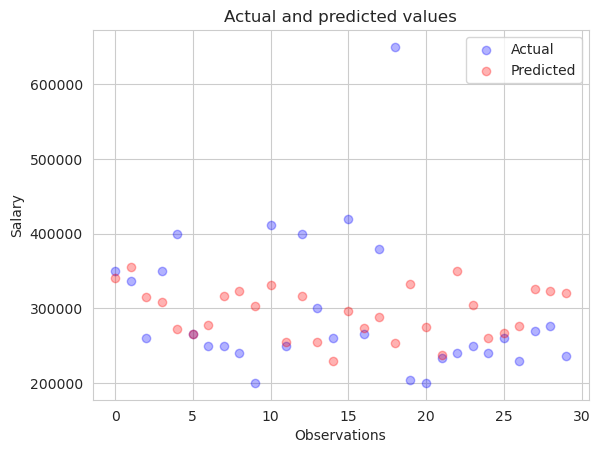

In [56]:
_, ax = plt.subplots()
ax.scatter(x = range(0, test_y.size), y=test_y, c = 'blue', label = 'Actual', alpha = 0.3)
ax.scatter(x = range(0, pred_y.size), y=pred_y, c = 'red', label = 'Predicted', alpha = 0.3)
plt.title('Actual and predicted values')
plt.xlabel('Observations')
plt.ylabel('Salary')
plt.legend()
plt.show()